### Problem Statement

Based on the data from 2014 Major League Baseball seasons the objective is to predict the number of wins for a given team in the 2015 season. In total there are 16 different features which will be analysed and based on their significance  will be used as inputs to the ML model.

In [1]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [160]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle

In [3]:
#import dataset using Github link
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.shape

(30, 17)

There are 17 columns and 30 rows present.

Output/Target variable:
1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.

Input/Independent variables:

2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.


In [5]:
#check information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No null values present in any of the column. Most of the data type is in the form of integer values and in one column float values are present.

In [6]:
#find out count, mean, standard deviation, minimum and maximum value and their value at 25,50,75 percentile for each column 
#by using describe function
#transpose the columns into row by using T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


### Exploratory Data Analysis

In [7]:
#check value count for each column so that we get unique values with their number of occurances.
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

#### Univariate Analysis

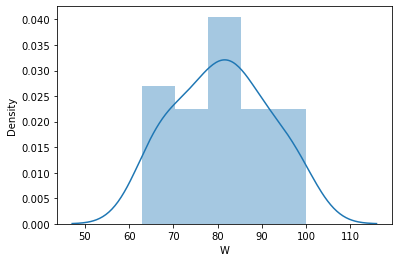

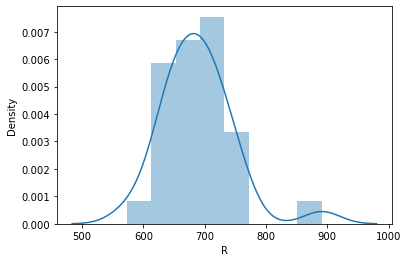

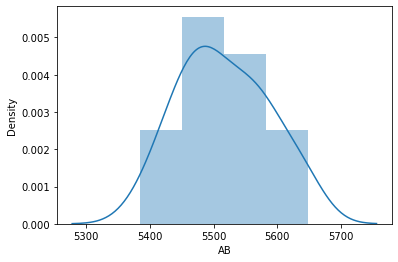

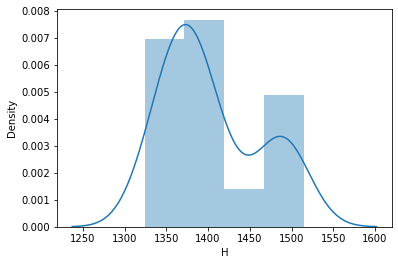

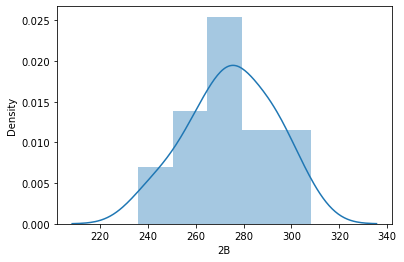

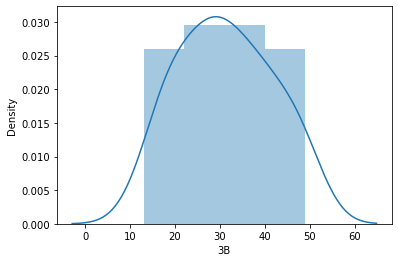

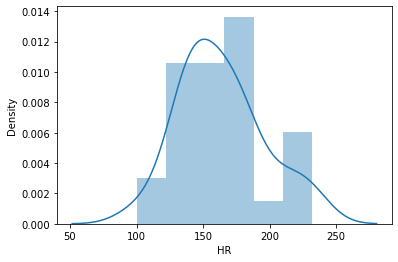

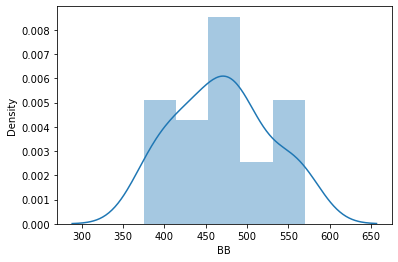

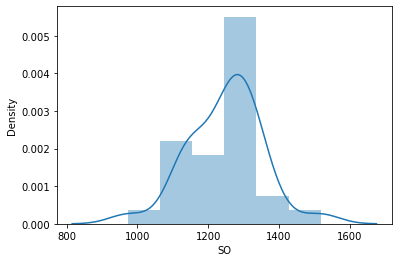

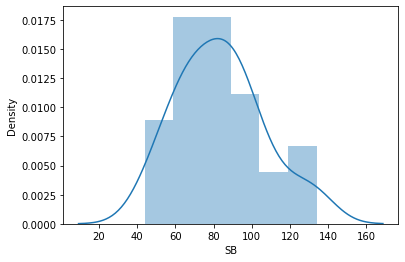

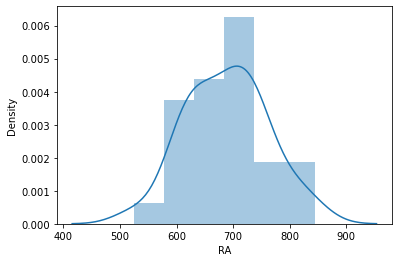

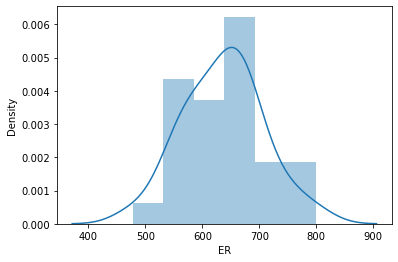

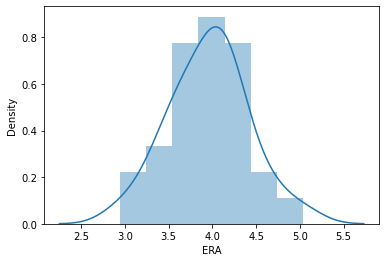

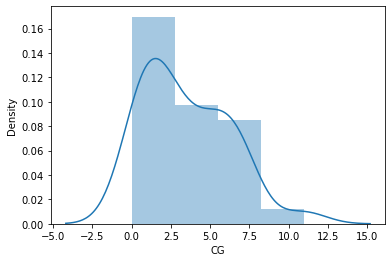

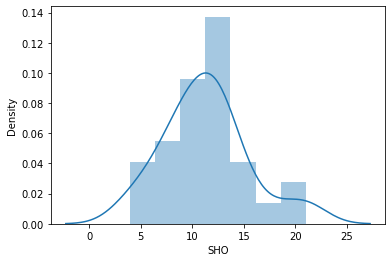

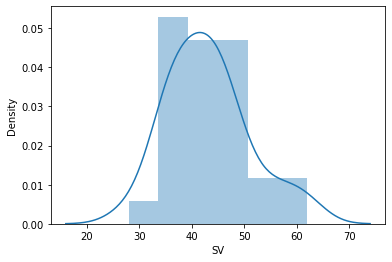

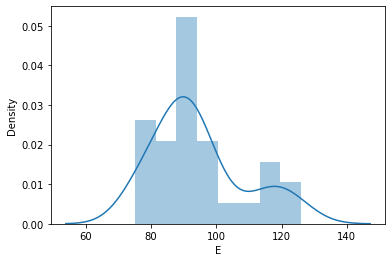

In [8]:
#Display distribution for all columns so that appropriate transformation can be applied later on.
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

Dependent variable (W) is close to normal distribution.In independent variables AB, 2B, 3B, RA, ER, ERA are close to normal distribution.

#### Bivariate Analysis

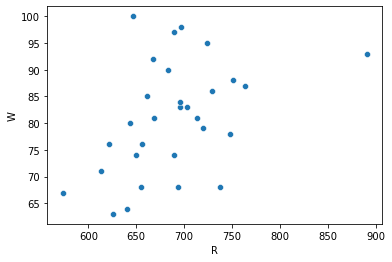

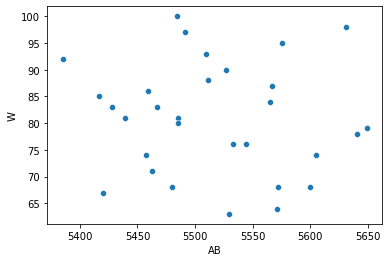

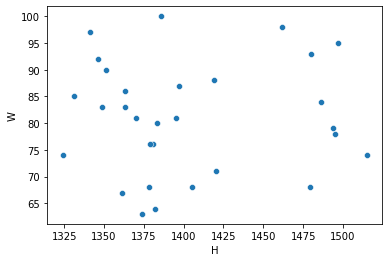

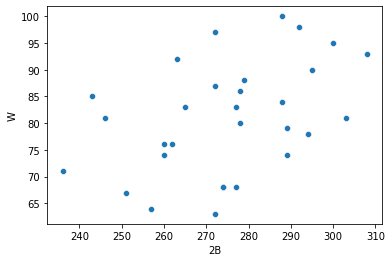

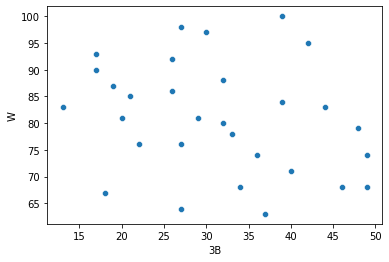

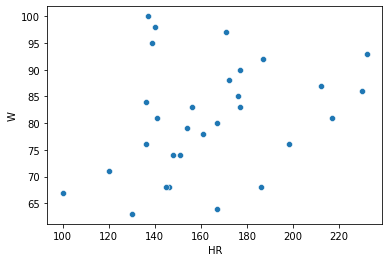

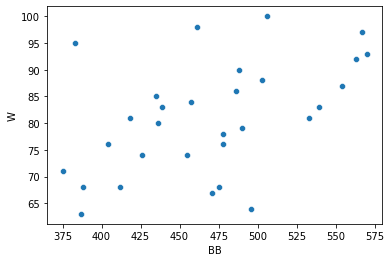

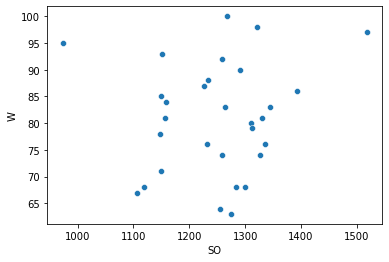

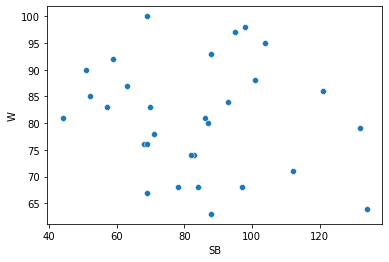

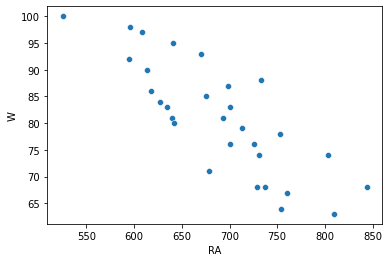

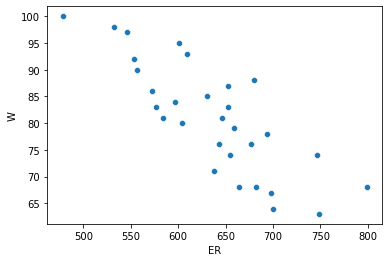

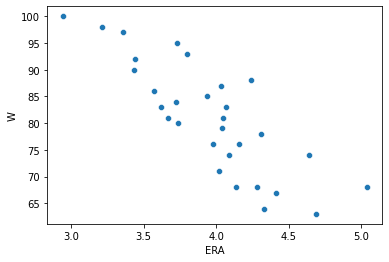

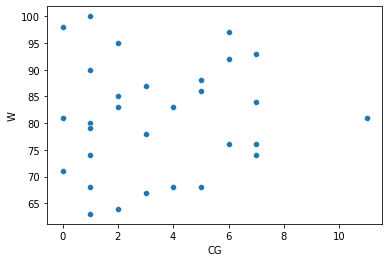

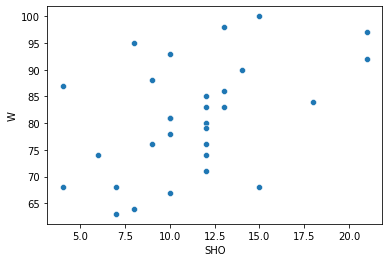

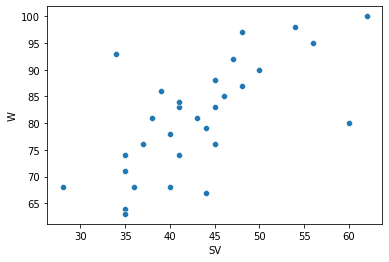

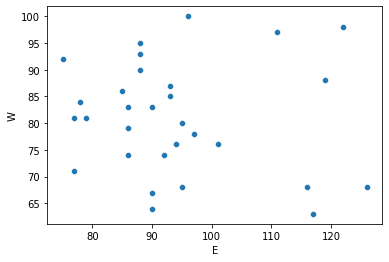

In [9]:
# for all columns check how the number of wins vary
for i in df.columns[1:]:
    sns.scatterplot(x=df[i],y=df['W'])
    plt.show()   

Following are the observations from the above chart:
1. In general, W is decreasing as RA, ER, ERA is increasing.
2. In general, W is increasing as SV is increasing.

#### Multivariate Analysis

<AxesSubplot:>

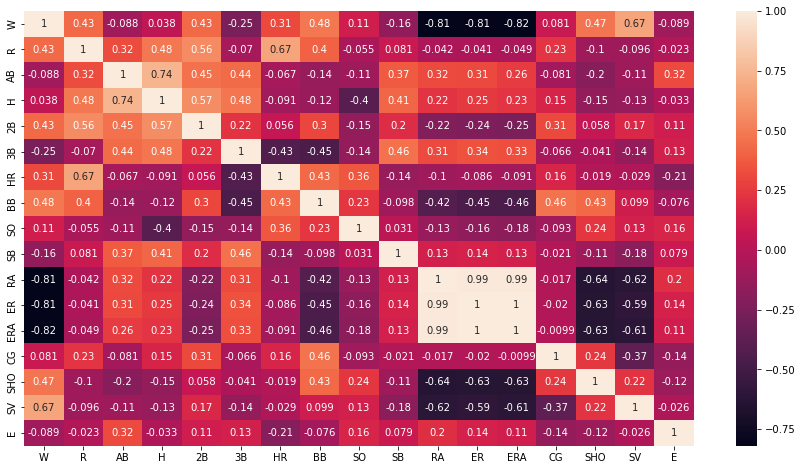

In [10]:
#Plot a heatmap using dataframe correlation values.
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

RA,ER and ERA are highly collinear with each other so keeping only ERA.
ERA and W has a high negative correlation, so ERA is a imporatant feature.
Some other features like H and AB have slightly higher correlation with each other but will handle those while tackling multicollinearity.

### Feature Engineering

In [11]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [12]:
# Create X with all independent variables.
X=df[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG', 'SHO', 'SV', 'E']]
X

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97


In [13]:
# Create y with dependent variable
y=df['W']
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [14]:
#Feature scaling
ss=StandardScaler()

In [15]:
#Apply standard scaler on X, so that all the features are on a similar scale.
X[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG', 'SHO', 'SV', 'E']]=ss.fit_transform(X[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG', 'SHO', 'SV', 'E']])
X

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.792164,-0.171757,-0.320914,-0.396360,0.194303


In [16]:
#check VIF to reduce multicollinearity
vif=pd.DataFrame()
vif['value']=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,10.987898,R
2,8.941874,H
5,7.882841,HR
9,4.951981,ERA
1,4.399954,AB
3,3.729413,2B
6,3.468244,BB
11,3.227759,SHO
4,3.142717,3B
12,2.948133,SV


In [17]:
#Dropping column R as its vif value is greater than 5
X.drop(columns=['R'],inplace=True)

In [18]:
#check vif again
vif=pd.DataFrame()
vif['value']=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
1,5.045576,H
8,4.511081,ERA
0,3.581051,AB
2,3.142250,2B
10,2.972910,SHO
3,2.850183,3B
5,2.767793,BB
11,2.371307,SV
9,2.260786,CG
6,1.963486,SO


After dropping R, vif values are not very high, so there is no multicollinearity

### Model Building

In [19]:
#split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=80)

In [20]:
X_train

,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
8,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.484557,-0.907856,0.172800,2.188598,0.048576
11,-0.826562,-0.721484,0.183611,-0.515731,2.121125,0.301276,1.409590,1.671738,-0.865333,0.564343,0.419657,-0.525608,-0.680061
2,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
23,-1.389471,-0.757084,-1.333988,-1.294193,-2.033766,0.033871,-1.384104,-0.646405,1.016150,-0.171757,-0.320914,0.120631,-0.315742
4,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.531318,1.300442,0.172800,-1.042600,-0.607197
25,-1.894646,-1.024080,-0.659500,-0.515731,0.746815,1.673953,0.096064,-1.092202,-1.156515,0.932393,2.394514,0.508375,-1.408697
12,-1.432772,-1.291077,-1.783647,-1.002270,0.395247,-0.607900,-0.962599,-1.404260,-0.036584,-0.539806,0.172800,0.379127,-0.097152
16,1.656011,1.040693,0.970514,-0.418423,-0.755338,-0.144398,0.723420,0.646405,-1.671683,-1.275906,0.419657,1.413111,2.015894
9,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.792164,-0.171757,-0.320914,-0.396360,0.194303
0,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.506955,-0.539806,-0.814629,1.671607,-0.461470


In [21]:
X_test

,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
14,1.208570,0.026106,0.127403,1.430424,-0.563574,0.105179,-1.266474,-0.245188,0.411388,0.564343,0.913371,-1.947335,2.307348
1,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.254598,-0.539806,0.172800,0.249879,-0.607197
13,0.400291,-0.436688,-0.715707,-0.904962,1.098383,0.158660,0.860654,-0.646405,0.456185,0.932393,0.172800,0.249879,-0.024288
20,0.154920,-0.935081,1.139136,-1.391501,0.427208,0.336930,0.409742,-1.448839,-1.178913,-0.907856,0.666514,0.896119,-0.461470
27,1.915815,1.610286,0.801892,1.625040,-0.307888,0.372584,0.625395,2.162114,0.187402,-0.907856,0.172800,0.120631,-0.607197
21,-1.274002,-0.721484,-0.547085,-1.780732,0.427208,1.246105,0.939073,-1.181361,-0.753340,0.196293,0.419657,-0.267112,-0.315742
24,0.183787,-0.525687,-0.153633,0.554654,-1.074945,-1.463595,0.252903,0.200609,1.643311,-0.907856,-1.061486,-1.042600,1.651576
7,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.209800,-1.275906,-0.320914,-0.008617,-1.262970


In [22]:
y_train

8      80
11     86
2      81
23     67
4      74
25     92
12     85
16     98
9      78
0      95
5      93
17     97
29     68
26     84
22     71
3      76
18     68
10     88
19     64
6      87
28     74
15    100
Name: W, dtype: int64

In [23]:
y_test

14    68
1     83
13    76
20    90
27    79
21    83
24    63
7     81
Name: W, dtype: int64

#### Linear Regression

In [24]:
#Fit the linear regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
#Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([ 84.30262396,  84.70442953,  82.38016094,  64.24686278,
        72.60786901,  93.22034649,  83.70859536,  96.2869095 ,
        78.6919266 ,  91.35212532,  92.36490847,  93.58974378,
        67.77759742,  85.08542689,  72.09105928,  78.04206159,
        72.23808703,  88.30663352,  66.90210964,  87.35342933,
        68.48517796, 102.26191559])

In [26]:
#Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

6.011110351689523

In [27]:
#Display the r2 score on train data
r2_score(y_train,y_train_pred)

0.9477670123838828

In [28]:
#Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([89.80155241, 74.00324503, 79.76944204, 79.11060839, 77.59954451,
       82.27651208, 60.88827816, 74.70531518])

In [29]:
#Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

91.95049583551618

In [30]:
#Display the r2 score on test data
r2_score(y_test,y_test_pred)

-0.3804437563858869

As we can see the metrics on train data is very good but on test data is poor. So we can conclude that model overfitting is hapenning.

We'll address the model overfitting by reducing the number of featured using Principal Component Analysis(PCA).

In [37]:
pca = PCA()
#plot the graph to find the principal components
X_train_pca = pca.fit_transform(X_train)
X_train_pca

array([[ 9.24040271e-01, -9.23158175e-01,  1.75358350e+00,
        -3.41636502e-01,  2.61174925e-01,  6.24060501e-01,
        -9.08612005e-01,  4.31821216e-01, -1.26181080e-01,
         2.30132356e-01, -4.27482385e-01,  7.02108199e-01,
        -1.03630923e-01],
       [ 1.79977535e+00,  7.53442032e-01, -1.23637559e+00,
        -1.49334567e+00, -1.01783236e+00,  1.83172567e+00,
        -9.77226839e-02,  6.62939765e-01,  6.30947412e-01,
        -1.84355560e-01, -1.18027928e-01,  2.99986538e-01,
         3.72392536e-02],
       [ 7.56622656e-01,  1.94925931e+00, -1.60691146e+00,
         1.82991607e+00,  1.33299418e-01, -7.05977652e-01,
         6.59429725e-01,  1.86470866e+00, -3.89115730e-01,
        -3.50407376e-01,  2.42057645e-02, -3.07785154e-02,
        -3.27410614e-02],
       [ 1.08239374e-01, -2.40172707e+00, -1.03372303e+00,
         1.59534321e+00,  1.05890266e+00, -9.86426027e-01,
         9.91311956e-01, -2.58021323e-01, -6.22482806e-01,
         5.24321197e-01, -1.46103557e

In [38]:
# Check the cumulative sum of variance ratio to decide on the acceptable loss in variance.
np.cumsum(pca.explained_variance_ratio_)

array([0.25110634, 0.43963071, 0.59435585, 0.71742418, 0.80884036,
       0.86642937, 0.90694479, 0.94357418, 0.963638  , 0.97963262,
       0.99129811, 0.99728323, 1.        ])

In [39]:
# As we can see using 7 components the loss in variance is less than 10% so we'll use only 7 components.
pca = PCA(n_components=7)
#plot the graph to find the principal components
X_train_pca = pca.fit_transform(X_train)
X_train_pca

array([[ 9.24040271e-01, -9.23158175e-01,  1.75358350e+00,
        -3.41636502e-01,  2.61174925e-01,  6.24060501e-01,
        -9.08612005e-01],
       [ 1.79977535e+00,  7.53442032e-01, -1.23637559e+00,
        -1.49334567e+00, -1.01783236e+00,  1.83172567e+00,
        -9.77226839e-02],
       [ 7.56622656e-01,  1.94925931e+00, -1.60691146e+00,
         1.82991607e+00,  1.33299418e-01, -7.05977652e-01,
         6.59429725e-01],
       [ 1.08239374e-01, -2.40172707e+00, -1.03372303e+00,
         1.59534321e+00,  1.05890266e+00, -9.86426027e-01,
         9.91311956e-01],
       [-2.46568261e+00,  1.82517420e+00, -4.77597443e-01,
         3.46528926e-01, -1.55424191e+00, -1.00517428e+00,
        -9.83944392e-01],
       [ 3.85135302e+00,  1.95435331e-01, -1.11923860e+00,
         1.58394983e+00, -3.27629311e-01,  1.97765476e-01,
        -9.15954329e-01],
       [ 1.28281549e+00, -2.46442569e+00, -9.02593526e-01,
         7.05216721e-01,  1.28726506e+00,  7.60214168e-06,
        -6.0233449

In [44]:
# Apply PCA on test data aswell
X_test_pca = pca.transform(X_test)
X_test_pca

array([[-1.27925775e+00,  5.53437133e-01,  3.34345767e-02,
        -2.28843856e-01, -8.74272408e-01, -1.98413628e+00,
         8.23470829e-01],
       [ 1.94137082e-01, -1.13285266e+00,  1.12478103e-01,
         3.97402472e-01, -4.60977443e-01, -6.60167451e-02,
        -1.39742159e+00],
       [ 9.27928284e-01,  7.80403409e-02, -9.67884177e-01,
        -9.84812397e-01,  2.69074175e-01, -5.15707963e-01,
        -7.23414467e-01],
       [ 2.03036372e+00,  1.28739447e-01,  9.28136608e-01,
         2.48521266e-02,  1.35271868e+00,  7.19905855e-02,
        -5.66981238e-01],
       [-1.77610657e+00,  1.39064294e+00,  1.54996297e+00,
        -8.46893241e-01, -1.76781099e+00,  1.28956475e+00,
         1.75069278e-01],
       [ 2.66577680e+00, -3.53956349e-01, -1.22522152e+00,
        -2.37965033e-01,  7.66510100e-01, -4.34527162e-01,
        -1.68938181e-03],
       [-2.05128738e+00, -1.90034085e+00, -7.18979092e-04,
        -1.42162626e+00, -3.37398753e-01, -1.30426153e+00,
         3.0795074

In [40]:
# Again build a Linear Regression model on PCA applied data.
lr=LinearRegression()
lr.fit(X_train_pca,y_train)

LinearRegression()

In [41]:
#Predict on train data
y_train_pred=lr.predict(X_train_pca)
y_train_pred

array([ 90.79299213,  85.53203913,  84.26875649,  71.70205014,
        75.09721286,  92.56081924,  78.56130271,  95.56242412,
        82.71830413,  89.16040151,  90.61543686,  92.9678131 ,
        66.34337228,  85.71991926,  66.66738144,  71.97702363,
        73.10431709,  80.94036164,  71.34422232,  86.66965874,
        72.34273097, 101.35146021])

In [42]:
#Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

20.540790921233665

In [43]:
#Display the r2 score on train data
r2_score(y_train,y_train_pred)

0.8215126964833557

In [45]:
#Predict on test data
y_test_pred=lr.predict(X_test_pca)
y_test_pred

array([74.5172049 , 80.4361436 , 81.49201055, 95.47096523, 84.50614861,
       85.53298804, 66.00289739, 79.01926152])

In [46]:
#Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

19.85192228440328

In [47]:
#Display the r2 score on test data
r2_score(y_test,y_test_pred)

0.7019650419418696

#### Random Forest

In [48]:
#Fit the random forest regressor model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([84.54, 84.85, 82.72, 70.75, 73.88, 91.61, 83.68, 95.88, 75.3 ,
       89.43, 87.32, 95.49, 70.16, 84.41, 73.29, 77.04, 70.06, 81.35,
       67.72, 85.19, 74.34, 96.11])

In [51]:
#Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

9.55470000000001

In [52]:
#Display the r2 score on train data
r2_score(y_train,y_train_pred)

0.916975317773788

In [53]:
#predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([76.7 , 78.94, 80.08, 92.67, 78.37, 85.47, 69.28, 76.99])

In [54]:
#Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

22.245650000000015

In [55]:
#Display the r2 score on test data
r2_score(y_test,y_test_pred)

0.6660282430213462

We can see the metrics on train data is good but on test data is not that good. SO there might be some overfitting hapenning. We'll try the PCA transformation and check.

In [62]:
# Again build a Random Forest Regressor model on PCA applied data.
rf=RandomForestRegressor()
rf.fit(X_train_pca,y_train)

RandomForestRegressor()

In [63]:
#Predict on train data
y_train_pred=rf.predict(X_train_pca)
y_train_pred

array([83.18, 87.83, 82.78, 71.85, 76.87, 88.4 , 81.47, 94.3 , 80.61,
       91.07, 89.11, 92.75, 72.54, 82.37, 72.2 , 74.56, 72.07, 85.23,
       68.47, 87.98, 74.02, 94.09])

In [64]:
#Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

11.356422727272728

In [65]:
#Display the r2 score on train data
r2_score(y_train,y_train_pred)

0.9013194147217235

In [68]:
#Predict on test data
y_test_pred=rf.predict(X_test_pca)
y_test_pred

array([81.44, 76.43, 82.7 , 91.22, 85.5 , 83.87, 71.99, 80.6 ])

In [69]:
#Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

49.27048749999997

In [70]:
#Display the r2 score on test data
r2_score(y_test,y_test_pred)

0.2603070138400192

After applying PCA the metrics of test data are even worse so we'll not use the data we got after PCA.

We'll do hyperparameter tuning in Random Forest model and see if it improves the metrics.

#### Hyperparameter Tuning

In [148]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 6, 7, 8],
    'max_features': [0.5, 0.6, 0.7, 0.8],
    'n_estimators': [20, 30, 40, 50, 60],
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 10)

In [149]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV 1/3; 1/160] START bootstrap=True, max_depth=5, max_features=0.5, n_estimators=20
[CV 1/3; 1/160] END bootstrap=True, max_depth=5, max_features=0.5, n_estimators=20;, score=0.352 total time=   0.0s
[CV 2/3; 1/160] START bootstrap=True, max_depth=5, max_features=0.5, n_estimators=20
[CV 2/3; 1/160] END bootstrap=True, max_depth=5, max_features=0.5, n_estimators=20;, score=0.294 total time=   0.0s
[CV 3/3; 1/160] START bootstrap=True, max_depth=5, max_features=0.5, n_estimators=20
[CV 3/3; 1/160] END bootstrap=True, max_depth=5, max_features=0.5, n_estimators=20;, score=0.531 total time=   0.0s
[CV 1/3; 2/160] START bootstrap=True, max_depth=5, max_features=0.5, n_estimators=30
[CV 1/3; 2/160] END bootstrap=True, max_depth=5, max_features=0.5, n_estimators=30;, score=0.563 total time=   0.0s
[CV 2/3; 2/160] START bootstrap=True, max_depth=5, max_features=0.5, n_estimators=30
[CV 2/3; 2/160] END bootstrap=True, max_depth=5,

[CV 1/3; 15/160] END bootstrap=True, max_depth=5, max_features=0.7, n_estimators=60;, score=0.463 total time=   0.0s
[CV 2/3; 15/160] START bootstrap=True, max_depth=5, max_features=0.7, n_estimators=60
[CV 2/3; 15/160] END bootstrap=True, max_depth=5, max_features=0.7, n_estimators=60;, score=0.594 total time=   0.0s
[CV 3/3; 15/160] START bootstrap=True, max_depth=5, max_features=0.7, n_estimators=60
[CV 3/3; 15/160] END bootstrap=True, max_depth=5, max_features=0.7, n_estimators=60;, score=0.518 total time=   0.0s
[CV 1/3; 16/160] START bootstrap=True, max_depth=5, max_features=0.8, n_estimators=20
[CV 1/3; 16/160] END bootstrap=True, max_depth=5, max_features=0.8, n_estimators=20;, score=0.429 total time=   0.0s
[CV 2/3; 16/160] START bootstrap=True, max_depth=5, max_features=0.8, n_estimators=20
[CV 2/3; 16/160] END bootstrap=True, max_depth=5, max_features=0.8, n_estimators=20;, score=0.609 total time=   0.0s
[CV 3/3; 16/160] START bootstrap=True, max_depth=5, max_features=0.8, n

[CV 1/3; 29/160] END bootstrap=True, max_depth=6, max_features=0.6, n_estimators=50;, score=0.359 total time=   0.0s
[CV 2/3; 29/160] START bootstrap=True, max_depth=6, max_features=0.6, n_estimators=50
[CV 2/3; 29/160] END bootstrap=True, max_depth=6, max_features=0.6, n_estimators=50;, score=0.580 total time=   0.0s
[CV 3/3; 29/160] START bootstrap=True, max_depth=6, max_features=0.6, n_estimators=50
[CV 3/3; 29/160] END bootstrap=True, max_depth=6, max_features=0.6, n_estimators=50;, score=0.503 total time=   0.0s
[CV 1/3; 30/160] START bootstrap=True, max_depth=6, max_features=0.6, n_estimators=60
[CV 1/3; 30/160] END bootstrap=True, max_depth=6, max_features=0.6, n_estimators=60;, score=0.436 total time=   0.0s
[CV 2/3; 30/160] START bootstrap=True, max_depth=6, max_features=0.6, n_estimators=60
[CV 2/3; 30/160] END bootstrap=True, max_depth=6, max_features=0.6, n_estimators=60;, score=0.589 total time=   0.0s
[CV 3/3; 30/160] START bootstrap=True, max_depth=6, max_features=0.6, n

[CV 3/3; 43/160] END bootstrap=True, max_depth=7, max_features=0.5, n_estimators=40;, score=0.460 total time=   0.0s
[CV 1/3; 44/160] START bootstrap=True, max_depth=7, max_features=0.5, n_estimators=50
[CV 1/3; 44/160] END bootstrap=True, max_depth=7, max_features=0.5, n_estimators=50;, score=0.493 total time=   0.0s
[CV 2/3; 44/160] START bootstrap=True, max_depth=7, max_features=0.5, n_estimators=50
[CV 2/3; 44/160] END bootstrap=True, max_depth=7, max_features=0.5, n_estimators=50;, score=0.601 total time=   0.0s
[CV 3/3; 44/160] START bootstrap=True, max_depth=7, max_features=0.5, n_estimators=50
[CV 3/3; 44/160] END bootstrap=True, max_depth=7, max_features=0.5, n_estimators=50;, score=0.413 total time=   0.0s
[CV 1/3; 45/160] START bootstrap=True, max_depth=7, max_features=0.5, n_estimators=60
[CV 1/3; 45/160] END bootstrap=True, max_depth=7, max_features=0.5, n_estimators=60;, score=0.481 total time=   0.0s
[CV 2/3; 45/160] START bootstrap=True, max_depth=7, max_features=0.5, n

[CV 2/3; 59/160] END bootstrap=True, max_depth=7, max_features=0.8, n_estimators=50;, score=0.571 total time=   0.0s
[CV 3/3; 59/160] START bootstrap=True, max_depth=7, max_features=0.8, n_estimators=50
[CV 3/3; 59/160] END bootstrap=True, max_depth=7, max_features=0.8, n_estimators=50;, score=0.462 total time=   0.0s
[CV 1/3; 60/160] START bootstrap=True, max_depth=7, max_features=0.8, n_estimators=60
[CV 1/3; 60/160] END bootstrap=True, max_depth=7, max_features=0.8, n_estimators=60;, score=0.423 total time=   0.0s
[CV 2/3; 60/160] START bootstrap=True, max_depth=7, max_features=0.8, n_estimators=60
[CV 2/3; 60/160] END bootstrap=True, max_depth=7, max_features=0.8, n_estimators=60;, score=0.514 total time=   0.0s
[CV 3/3; 60/160] START bootstrap=True, max_depth=7, max_features=0.8, n_estimators=60
[CV 3/3; 60/160] END bootstrap=True, max_depth=7, max_features=0.8, n_estimators=60;, score=0.523 total time=   0.0s
[CV 1/3; 61/160] START bootstrap=True, max_depth=8, max_features=0.5, n

[CV 1/3; 74/160] END bootstrap=True, max_depth=8, max_features=0.7, n_estimators=50;, score=0.431 total time=   0.0s
[CV 2/3; 74/160] START bootstrap=True, max_depth=8, max_features=0.7, n_estimators=50
[CV 2/3; 74/160] END bootstrap=True, max_depth=8, max_features=0.7, n_estimators=50;, score=0.558 total time=   0.0s
[CV 3/3; 74/160] START bootstrap=True, max_depth=8, max_features=0.7, n_estimators=50
[CV 3/3; 74/160] END bootstrap=True, max_depth=8, max_features=0.7, n_estimators=50;, score=0.451 total time=   0.0s
[CV 1/3; 75/160] START bootstrap=True, max_depth=8, max_features=0.7, n_estimators=60
[CV 1/3; 75/160] END bootstrap=True, max_depth=8, max_features=0.7, n_estimators=60;, score=0.511 total time=   0.0s
[CV 2/3; 75/160] START bootstrap=True, max_depth=8, max_features=0.7, n_estimators=60
[CV 2/3; 75/160] END bootstrap=True, max_depth=8, max_features=0.7, n_estimators=60;, score=0.535 total time=   0.0s
[CV 3/3; 75/160] START bootstrap=True, max_depth=8, max_features=0.7, n

[CV 2/3; 89/160] END bootstrap=False, max_depth=5, max_features=0.6, n_estimators=50;, score=0.495 total time=   0.0s
[CV 3/3; 89/160] START bootstrap=False, max_depth=5, max_features=0.6, n_estimators=50
[CV 3/3; 89/160] END bootstrap=False, max_depth=5, max_features=0.6, n_estimators=50;, score=0.245 total time=   0.0s
[CV 1/3; 90/160] START bootstrap=False, max_depth=5, max_features=0.6, n_estimators=60
[CV 1/3; 90/160] END bootstrap=False, max_depth=5, max_features=0.6, n_estimators=60;, score=0.198 total time=   0.0s
[CV 2/3; 90/160] START bootstrap=False, max_depth=5, max_features=0.6, n_estimators=60
[CV 2/3; 90/160] END bootstrap=False, max_depth=5, max_features=0.6, n_estimators=60;, score=0.470 total time=   0.0s
[CV 3/3; 90/160] START bootstrap=False, max_depth=5, max_features=0.6, n_estimators=60
[CV 3/3; 90/160] END bootstrap=False, max_depth=5, max_features=0.6, n_estimators=60;, score=0.245 total time=   0.0s
[CV 1/3; 91/160] START bootstrap=False, max_depth=5, max_featu

[CV 2/3; 103/160] END bootstrap=False, max_depth=6, max_features=0.5, n_estimators=40;, score=0.567 total time=   0.0s
[CV 3/3; 103/160] START bootstrap=False, max_depth=6, max_features=0.5, n_estimators=40
[CV 3/3; 103/160] END bootstrap=False, max_depth=6, max_features=0.5, n_estimators=40;, score=0.251 total time=   0.0s
[CV 1/3; 104/160] START bootstrap=False, max_depth=6, max_features=0.5, n_estimators=50
[CV 1/3; 104/160] END bootstrap=False, max_depth=6, max_features=0.5, n_estimators=50;, score=0.198 total time=   0.0s
[CV 2/3; 104/160] START bootstrap=False, max_depth=6, max_features=0.5, n_estimators=50
[CV 2/3; 104/160] END bootstrap=False, max_depth=6, max_features=0.5, n_estimators=50;, score=0.485 total time=   0.0s
[CV 3/3; 104/160] START bootstrap=False, max_depth=6, max_features=0.5, n_estimators=50
[CV 3/3; 104/160] END bootstrap=False, max_depth=6, max_features=0.5, n_estimators=50;, score=0.354 total time=   0.0s
[CV 1/3; 105/160] START bootstrap=False, max_depth=6,

[CV 1/3; 118/160] END bootstrap=False, max_depth=6, max_features=0.8, n_estimators=40;, score=-0.079 total time=   0.0s
[CV 2/3; 118/160] START bootstrap=False, max_depth=6, max_features=0.8, n_estimators=40
[CV 2/3; 118/160] END bootstrap=False, max_depth=6, max_features=0.8, n_estimators=40;, score=0.432 total time=   0.0s
[CV 3/3; 118/160] START bootstrap=False, max_depth=6, max_features=0.8, n_estimators=40
[CV 3/3; 118/160] END bootstrap=False, max_depth=6, max_features=0.8, n_estimators=40;, score=-0.008 total time=   0.0s
[CV 1/3; 119/160] START bootstrap=False, max_depth=6, max_features=0.8, n_estimators=50
[CV 1/3; 119/160] END bootstrap=False, max_depth=6, max_features=0.8, n_estimators=50;, score=-0.071 total time=   0.0s
[CV 2/3; 119/160] START bootstrap=False, max_depth=6, max_features=0.8, n_estimators=50
[CV 2/3; 119/160] END bootstrap=False, max_depth=6, max_features=0.8, n_estimators=50;, score=0.414 total time=   0.0s
[CV 3/3; 119/160] START bootstrap=False, max_depth

[CV 3/3; 134/160] END bootstrap=False, max_depth=7, max_features=0.7, n_estimators=50;, score=0.033 total time=   0.0s
[CV 1/3; 135/160] START bootstrap=False, max_depth=7, max_features=0.7, n_estimators=60
[CV 1/3; 135/160] END bootstrap=False, max_depth=7, max_features=0.7, n_estimators=60;, score=-0.083 total time=   0.0s
[CV 2/3; 135/160] START bootstrap=False, max_depth=7, max_features=0.7, n_estimators=60
[CV 2/3; 135/160] END bootstrap=False, max_depth=7, max_features=0.7, n_estimators=60;, score=0.429 total time=   0.0s
[CV 3/3; 135/160] START bootstrap=False, max_depth=7, max_features=0.7, n_estimators=60
[CV 3/3; 135/160] END bootstrap=False, max_depth=7, max_features=0.7, n_estimators=60;, score=0.126 total time=   0.0s
[CV 1/3; 136/160] START bootstrap=False, max_depth=7, max_features=0.8, n_estimators=20
[CV 1/3; 136/160] END bootstrap=False, max_depth=7, max_features=0.8, n_estimators=20;, score=-0.102 total time=   0.0s
[CV 2/3; 136/160] START bootstrap=False, max_depth=

[CV 2/3; 149/160] END bootstrap=False, max_depth=8, max_features=0.6, n_estimators=50;, score=0.473 total time=   0.0s
[CV 3/3; 149/160] START bootstrap=False, max_depth=8, max_features=0.6, n_estimators=50
[CV 3/3; 149/160] END bootstrap=False, max_depth=8, max_features=0.6, n_estimators=50;, score=0.250 total time=   0.0s
[CV 1/3; 150/160] START bootstrap=False, max_depth=8, max_features=0.6, n_estimators=60
[CV 1/3; 150/160] END bootstrap=False, max_depth=8, max_features=0.6, n_estimators=60;, score=0.138 total time=   0.0s
[CV 2/3; 150/160] START bootstrap=False, max_depth=8, max_features=0.6, n_estimators=60
[CV 2/3; 150/160] END bootstrap=False, max_depth=8, max_features=0.6, n_estimators=60;, score=0.392 total time=   0.0s
[CV 3/3; 150/160] START bootstrap=False, max_depth=8, max_features=0.6, n_estimators=60
[CV 3/3; 150/160] END bootstrap=False, max_depth=8, max_features=0.6, n_estimators=60;, score=0.268 total time=   0.0s
[CV 1/3; 151/160] START bootstrap=False, max_depth=8,

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 6, 7, 8],
                         'max_features': [0.5, 0.6, 0.7, 0.8],
                         'n_estimators': [20, 30, 40, 50, 60]},
             verbose=10)

In [150]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_depth': 5, 'max_features': 0.8, 'n_estimators': 30}


In [151]:
#Fit the random forest regressor model
rf=RandomForestRegressor(**best_params)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features=0.8, n_estimators=30)

In [152]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([84.94277778, 85.29055556, 83.28722222, 72.15833333, 74.05833333,
       91.96888889, 83.88833333, 94.17222222, 75.88055556, 89.36666667,
       87.84222222, 94.48      , 70.56666667, 84.00833333, 75.15      ,
       76.27222222, 70.52888889, 84.34111111, 69.21666667, 85.43555556,
       76.77777778, 96.80555556])

In [153]:
#Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

10.595208641975317

In [154]:
#Display the r2 score on train data
r2_score(y_train,y_train_pred)

0.9079339141343618

In [155]:
#predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([77.41388889, 80.425     , 83.61277778, 92.69055556, 80.17222222,
       86.06833333, 70.7       , 78.18333333])

In [156]:
#Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

29.8072236496914

In [157]:
#Display the r2 score on test data
r2_score(y_test,y_test_pred)

0.5525070810273869

Even after hyperparameter tuning the metrics on test data has not improved in Random Forest Regressor.

Linear Regression Model on PCA transformed data has better results. MSE is 19.8 and R2 is 0.7. So we'll use this model.

In [161]:
# Saving the best model
pickle.dump(lr, open('model_baseball.pkl', 'wb'))